In [105]:
from phidl import Device, Layer, LayerSet
from phidl.device_layout import DeviceReference
from phidl import quickplot as qp

import phidl.geometry as pg
import phidl.utilities as pu
import phidl.routing as pr
import phidl.path as pp

import numpy as np
import pickle

from dataclasses import dataclass, field, replace

from typing import Tuple, Optional

import itertools

In [106]:
import importlib

from components import utils
importlib.reload(utils)

from components import default_layerset
importlib.reload(default_layerset)
from components import junction_two_wire
importlib.reload(junction_two_wire)
from components import junction_four_wire
importlib.reload(junction_four_wire)
from components import squid_two_wire
importlib.reload(squid_two_wire)
from components import squid_four_wire
importlib.reload(squid_four_wire)
from components import double_square_spiral_two_wire
importlib.reload(double_square_spiral_two_wire)
from components import contact_resistance
importlib.reload(contact_resistance)


from components import squid
importlib.reload(squid)
from components import junction
importlib.reload(junction)
from components import resistor
importlib.reload(resistor)


from components.default_layerset import default_ls, ebeam_test_doses, undercut_test_doses, ebeam_log_test_doses
from components.junction import JJ, JJParams
from components.resistor import Resistor, ResParams
from components.squid import Squid, SquidParams

from components.junction_two_wire import JJ2Wire, PadParams
from components.junction_four_wire import JJ4Wire
from components.squid_two_wire import Squid2Wire
from components.squid_four_wire import Squid4Wire
from components.resistor_two_wire import Resistor2Wire
from components.contact_resistance import ContactResistance
from components.double_square_spiral_two_wire import DoubleSquareSpiral2Wire, SquareSpiralParams
from components.utils import WritefieldParams

In [107]:
writefield_params = WritefieldParams()

In [108]:
# 3 junctions in two and four wire configuration
length = 30
list_jj_params = [JJParams(bridge_width=0.4, jj_width=0.12, total_length=length), 
                  JJParams(total_length=length)]

res_params = ResParams(num_segments=7, segment_length=25, connector_width=12, spacing=4)

list_jj2wire: list[Device] = []
list_jj4wire: list[Device] = []

for i,jj_params in enumerate(list_jj_params):
    pad_params = PadParams(name=f'J{i}')
    jj2wire = JJ2Wire()

    jj_params_2wire = replace(jj_params)
    jj_params_2wire.total_length += 20
    jj2wire.generate_junction_two_wire(jj_params_2wire, pad_params, writefield_params)
    jj2wire.device.rotate(-90)

    list_jj2wire.append(jj2wire.device)

    jj4wire = JJ4Wire()
    jj4wire.generate_junction_four_wire(jj_params, res_params, pad_params, writefield_params)
    
    list_jj4wire.append(jj4wire.device)
    jj4wire.device.rotate(-90)

In [109]:
# 3 squids in two and four wire configuration

length = 40
loop_size = 15
list_squid_params = [SquidParams(bridge_width=0.4, jj_width=0.12,total_length=length, loop_height=loop_size, island_width=loop_size), 
                     SquidParams(total_length=length, loop_height=loop_size, island_width=loop_size)]

res_params = ResParams(num_segments=7, segment_length=25, connector_width=12, spacing=4)

list_squid2wire: list[Device] = []
list_squid4wire: list[Device] = []

for i,squid_params in enumerate(list_squid_params):
    pad_params = PadParams(name=f'S{i}')
    squid2wire = Squid2Wire()

    squid_params_2wire = replace(squid_params)
    squid_params_2wire.total_length += 20
    squid2wire.generate_squid_two_wire(squid_params_2wire, pad_params, writefield_params)
    squid2wire.device.rotate(-90)

    list_squid2wire.append(squid2wire.device)

    squid4wire = Squid4Wire()
    squid4wire.generate_squid_four_wire(squid_params, res_params, pad_params, writefield_params)
    squid4wire.device.rotate(-90)
    
    list_squid4wire.append(squid4wire.device)

In [110]:
# 9 resistors
connector_width=15

# list_res_params = []
# list_res_params.append(ResParams(small_resistor=True, num_segments=5, segment_length=25, spacing=5, connectors=True, connector_width=connector_width)) #10kOhm
# list_res_params.append(ResParams(small_resistor=True, num_segments=5, segment_length=50, spacing=5, connectors=True, connector_width=connector_width)) #20kOhm
# list_res_params.append(ResParams(small_resistor=True, num_segments=2, segment_length=50, spacing=10, connectors=True, connector_width=connector_width)) #50kOhm
# list_res_params.append(ResParams(num_segments=2, segment_length=25, connectors=True, connector_width=connector_width, spacing=15)) #100kOhm
# list_res_params.append(ResParams(num_segments=4, segment_length=50, connectors=True, connector_width=connector_width, spacing=10)) #400kOhm
# list_res_params.append(ResParams(num_segments=8, segment_length=50, connectors=True, connector_width=connector_width, spacing=5)) #800kOhm
# list_res_params.append(ResParams(num_segments=10, connectors=True, connector_width=connector_width)) #1MOhm
# list_res_params.append(ResParams(num_segments=20,connectors=True, connector_width=connector_width)) #2MOhm
# list_res_params.append(ResParams(num_segments=36, segment_length=70, spacing=2.1, connectors=True, connector_width=connector_width)) #5MOhm

# list_res_params = []
# list_res_params.append(ResParams(small_resistor=True, connectors=True, num_segments=20, segment_length=10, connector_width=connector_width)) #1kOhm
# list_res_params.append(ResParams(small_resistor=True, connectors=True, num_segments=10, segment_length=25, connector_width=connector_width)) #5kOhm
# list_res_params.append(ResParams(small_resistor=True, connectors=True, num_segments=5, spacing=4, segment_length=25, connector_width=connector_width)) #10kOhm
# #list_res_params.append(ResParams(small_resistor=True, connectors=False, num_segments=2, segment_length=50)) #50kOhm
# list_res_params.append(ResParams(num_segments=2, segment_length=25, spacing=20, connector_width=connector_width)) #100kOhm
# #list_res_params.append(ResParams(num_segments=4, segment_length=50)) #400kOhm
# list_res_params.append(ResParams(num_segments=10, connector_width=connector_width)) #1MOhm

#list_res_params.append(ResParams(num_segments=20)) #2MOhm
#list_res_params.append(ResParams(num_segments=38, segment_length=65, spacing=2.1)) #5MOhm


list_res_params = []


list_res_params.append(ResParams(small_resistor=True, connectors=True, num_segments=40, segment_length=5, spacing=1.35, connector_width=connector_width)) ### 250Ohm
list_res_params.append(ResParams(small_resistor=True, connectors=True, num_segments=24, segment_length=6, spacing=2.3, connector_width=connector_width)) ### 500Ohm
list_res_params.append(ResParams(small_resistor=True, connectors=True, num_segments=22, segment_length=7.5, spacing=2.6, connector_width=connector_width)) ### 666Ohm
list_res_params.append(ResParams(small_resistor=True, connectors=True, num_segments=15, segment_length=7.5, spacing=3, connector_width=connector_width)) ### 1kOhm

list_res_params.append(ResParams(num_segments=2, connectors=True, spacing=30, segment_length=25, connector_width=connector_width)) #100kOhm
list_res_params.append(ResParams(num_segments=4, connectors=True, segment_length=25, spacing=10, connector_width=connector_width)) #200kOhm



list_res2wire: list[Device] = []

for i,res_params in enumerate(list_res_params):
    pad_params = PadParams(name=f'R{i}')
    res2wire = Resistor2Wire()
    res2wire.generate_resistor_two_wire(res_params, pad_params, writefield_params)
    res2wire.device.rotate(-90)

    list_res2wire.append(res2wire.device)


In [111]:
# doubly wound spirals

# list_spiral_params = []
# list_spiral_params.append(SquareSpiralParams(connector_length=11, num_turns=7))
# list_spiral_params.append(SquareSpiralParams(connector_length=8, num_turns=6, turn_spacing_x=2.5, turn_spacing_y=2.5))

# list_squarespiral2wire: list[Device] = []

# for i,spiral_params in enumerate(list_spiral_params):
#     pad_params = PadParams(name=f'SP{i}')
#     spiral = DoubleSquareSpiral2Wire()
#     spiral.generate_double_square_spiral_two_wire(spiral_params=spiral_params, pad_params=pad_params, writefield_params=writefield_params)

#     list_squarespiral2wire.append(spiral.device)

In [112]:
stress_boxes_height = 0.6
list_jj_params.append(JJParams(undercut_shape='H_asym_slits', stress_boxes_height=stress_boxes_height, total_length=length, stress_boxes_width=0.05))

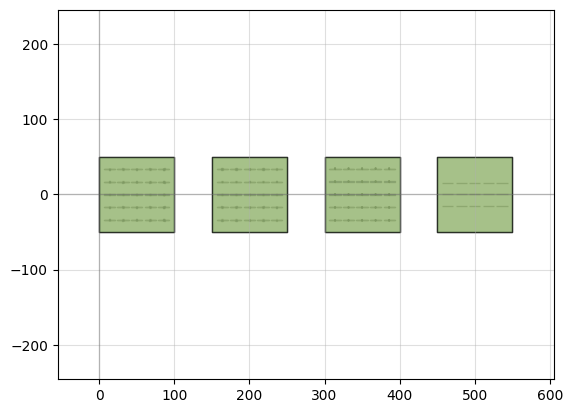

In [113]:
# ebeam dose test

Dose_Test_JJs: list[Device] = []

# junctions
for jj_params in list_jj_params:
    Undercut_Dose_Test_JJs: list[Device] = []

    for i,dose in enumerate(ebeam_test_doses):
        JJs: list[Device] = []

        for j,undercut_dose in enumerate(undercut_test_doses):

            
                dose_test_jj = JJ()
                dose_test_jj_params = replace(jj_params)
                dose_test_jj_params.layer = default_ls[f'ebeam_test_{i}']
                dose_test_jj_params.undercut_layer = default_ls[f'undercut_test_{j}']
                dose_test_jj_params.total_length = 15

                dose_test_jj.generate_jj(dose_test_jj_params)
                JJs.append(dose_test_jj.device)

        Undercut_Dose_Test_JJs.append(utils.pack_devices_x(JJs, spacing=15))

    Dose_Test_JJs.append(utils.pack_devices_y(Undercut_Dose_Test_JJs, spacing=3))
    utils.add_writefield(writefield_params, Dose_Test_JJs[-1])
    Dose_Test_JJs[-1].rotate(-90)
    


Dose_Test_Squids: list[Device] = []

# squids
for squid_params in list_squid_params:
    Undercut_Dose_Test_Squids: list[Device] = []

    for i,dose in enumerate(ebeam_test_doses):
        Squids: list[Device] = []

        for j,undercut_dose in enumerate(undercut_test_doses):

            
                dose_test_squid = Squid()
                dose_test_squid_params = replace(squid_params)
                dose_test_squid_params.layer = default_ls[f'ebeam_test_{i}']
                dose_test_squid_params.jj_undercut_layer = default_ls[f'undercut_test_{j}']
                dose_test_squid_params.connectors = False
                dose_test_squid_params.island_width = 10
                dose_test_squid_params.loop_height = 10

                dose_test_squid.generate_squid(dose_test_squid_params)
                Squids.append(dose_test_squid.device)

        Undercut_Dose_Test_Squids.append(utils.pack_devices_x(Squids, spacing=9))

    Dose_Test_Squids.append(utils.pack_devices_y(Undercut_Dose_Test_Squids, spacing=3))
    utils.add_writefield(writefield_params, Dose_Test_Squids[-1])
    Dose_Test_Squids[-1].rotate(-90)
    
#Dose_Test = utils.pack_devices_x(Dose_Test_JJs + Dose_Test_Squids)

Single_Pass_Lines: list[Device] = []

Lines = []

for i,dose in enumerate(ebeam_log_test_doses):
    JJs: list[Device] = []

    for j in range(3):

        
            dose_test_jj = JJ()
            dose_test_jj_params = JJParams(jj_width=0.05, arm_width=0.05, bridge_width=0, undercut_shape='rectangle')
            dose_test_jj_params.layer = default_ls[f'ebeam_log_test_{i}']
            dose_test_jj_params.undercut_layer = default_ls[f'undercut_test_{j}']
            dose_test_jj_params.total_length = 15

            dose_test_jj.generate_jj(dose_test_jj_params)
            JJs.append(dose_test_jj.device)

    Lines.append(utils.pack_devices_x(JJs, spacing=15))

Single_Pass_Lines.append(utils.pack_devices_y(Lines, spacing=3))
utils.add_writefield(writefield_params, Single_Pass_Lines[-1])
Single_Pass_Lines[-1].rotate(-90)


Dose_Test = utils.pack_devices_x(Dose_Test_JJs + Single_Pass_Lines)


qp(Dose_Test)


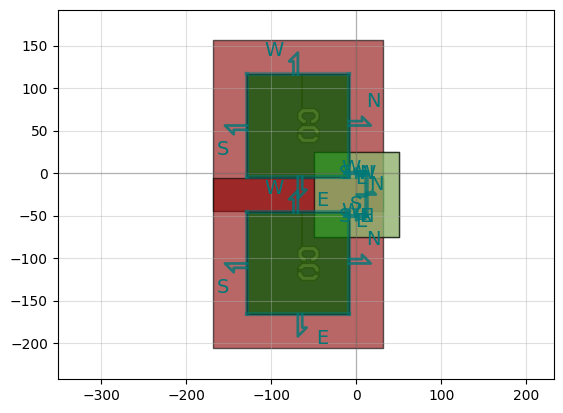

In [114]:
Al_Cr_length=50
Al_length=25

squid_params = SquidParams(island_width=Al_Cr_length, total_length=Al_length)
pad_params = PadParams(name='C0')
writefield_params = WritefieldParams()

contact = ContactResistance()

contact.generate_contact_resistance(squid_params, pad_params, writefield_params)

contact.device.rotate(-90)

qp(contact.device)

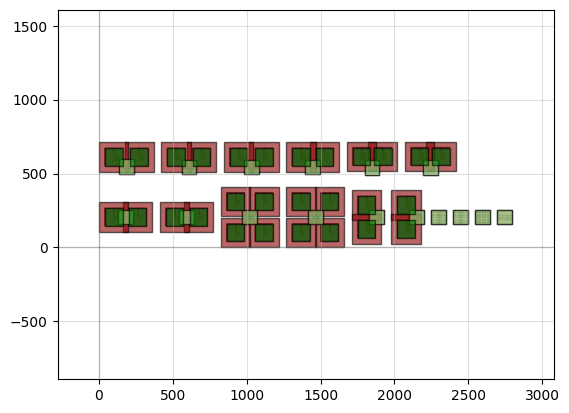

In [115]:
packed_device = utils.pack_devices_y([utils.pack_devices_x(list_jj2wire + list_jj4wire + [contact.device]*2 + [Dose_Test]),
                                 utils.pack_devices_x(list_res2wire)])# utils.pack_devices_x(list_squarespiral2wire)])

qp(packed_device)


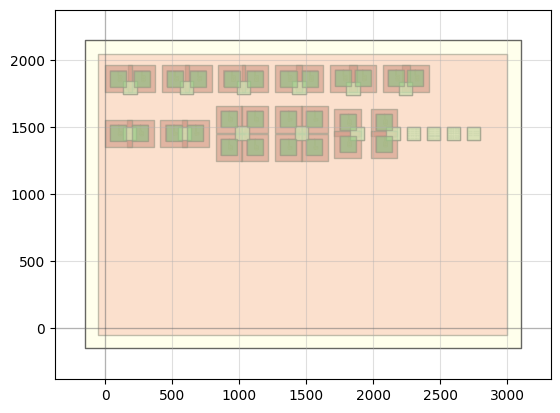

In [116]:
ground_avoidance_spacing = 100

Test_Structures = packed_device
# Test_Structures = utils.pack_devices_y([packed_device, Dose_Test])
# Test_Structures << pg.offset(pg.bbox(Test_Structures.bbox), distance=ground_avoidance_spacing/2, layer=default_ls['optical'])
# Test_Structures << pg.offset(Test_Structures, distance=ground_avoidance_spacing, layer=default_ls['ground_avoidance'])

Test_Structures.movey(1250)

Test_Structures << pg.rectangle(size=(3050, 2096.46), layer=default_ls['optical']).move((-ground_avoidance_spacing/2, -ground_avoidance_spacing/2))
Test_Structures << pg.offset(Test_Structures, distance=ground_avoidance_spacing, layer=default_ls['ground_avoidance'])

qp(Test_Structures)

In [117]:
Test_Structures.write_gds('Test_Structures.gds')

with open('test_structures.pkl', 'wb') as f:
    pickle.dump(Test_Structures, f)